## Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

## Load data and fixing some data points

In [10]:
covid19 = np.loadtxt("/content/drive/My Drive/Book_3.csv", delimiter=',')
covid19.shape

(36, 8)

In [105]:
covid19[34,4] = 1488
covid19[35,4] = 1631
covid19[32,2] = 44653
covid19[33,2] = 46300
covid19[34,2] = 48060
covid19[35,2] = 48260
covid19[34,3] = 6920

## Model

In [236]:
def SEIR_step(population,params,t):
  
  c0,cu,k,bet,q,sig,lamb,delI,delq,gammI,gammH,alp = params
  S,Sq,E,Eq,I,H,R,Death,total_H = population
  N = sum(population)

  if (t > 12):
    ct = (c0 - cu) * math.exp(-k*(t-12)) + cu
  else:
    ct = c0
  
  p11 = 1 - math.exp(-bet*ct*I/N)
  p12 = 1 - math.exp(-ct*q*(1-bet)*I/N)
  p21 = 1 - math.exp(-sig)
  p31 = 1 - math.exp(-delI)
  p32 = 1 - math.exp(-alp)
  p33 = 1 - math.exp(-gammI)
  p41 = 1 - math.exp(-lamb)
  p51 = 1 - math.exp(-delq)
  p61 = 1 - math.exp(-gammH)

  B11 = np.random.poisson(S*p11)
  B12 = np.random.poisson(S*p12)
  B21 = np.random.binomial(E,p21)
  B31 = np.random.binomial(I,p31)
  B32 = np.random.binomial(I,p32)
  B33 = np.random.binomial(I,p33)
  B41 = np.random.binomial(Sq,p41)
  B51 = np.random.binomial(Eq,p51)
  B61 = np.random.binomial(H,p61)
  B62 = np.random.binomial(H,p32)

  delta_S = B41 - B11 - B12
  delta_E = (1-q)*B11 - B21
  delta_I = B21 - B31 - B32 - B33
  delta_Sq = B12 - B41
  delta_Eq = q*B11 - B51
  delta_H = B31 + B51 - B61 - B62
  delta_R = B33 + B61
  delta_Death = B32 + B62
  delta_total_H = B31 + B51
  
  return [S+delta_S, Sq+delta_Sq if Sq+delta_Sq>0 else 0, E+delta_E if E+delta_E>0 else 0, Eq+delta_Eq, 
          I+delta_I if I+delta_I>0 else 0, H+delta_H, R+delta_R, Death+delta_Death, total_H+delta_total_H]

In [242]:
def simulate(T):
  params = [34.037,0.933,0.144,0.111,0.415,1/7,1/14,0.304,0.413,0.0085,0.018,0.0027]
  population = [1.4e10,734,52,5,31,41,6,1,41]
  t = np.linspace(0,T-1,T)
  
  S = np.zeros(T)
  Sq = np.zeros(T)
  E = np.zeros(T)
  Eq = np.zeros(T)
  I = np.zeros(T)
  H = np.zeros(T)
  R = np.zeros(T)
  Death = np.zeros(T)
  total_H = np.zeros(T)

  S[0],Sq[0],E[0],Eq[0],I[0],H[0],R[0],Death[0],total_H[0] = population

  for j in range(1,T):
    population = SEIR_step(population,params,t[j])
    S[j],Sq[j],E[j],Eq[j],I[j],H[j],R[j],Death[j],total_H[j] = population
  return {'t':t,'S':S,'Sq':Sq,'E':E,'Eq':Eq,'I':I,'H':H,'R':R, 'D':Death,'total_H':total_H}


### Model for assumption simulation

In [18]:
def SEIR_step(population,params,t,t_assum,ct_assum):
  
  c0,cu,k,bet,q,sig,lamb,delI,delq,gammI,gammH,alp = params
  S,Sq,E,Eq,I,H,R,Death,total_H = population
  N = sum(population)

  if (t > 12 and t < t_assum):
    ct = (c0 - cu) * math.exp(-k*(t-12)) + cu
  elif (t >= t_assum):
    ct = (11 - ct_assum) * math.exp(-k*(t-t_assum)) + ct_assum
  else:
    ct = c0
  
  p11 = 1 - math.exp(-bet*ct*I/N)
  p12 = 1 - math.exp(-ct*q*(1-bet)*I/N)
  p21 = 1 - math.exp(-sig)
  p31 = 1 - math.exp(-delI)
  p32 = 1 - math.exp(-alp)
  p33 = 1 - math.exp(-gammI)
  p41 = 1 - math.exp(-lamb)
  p51 = 1 - math.exp(-delq)
  p61 = 1 - math.exp(-gammH)


  #print(I)
  #print(ct)
  #print(-bet*ct*I/N)
  #print(S)
  B11 = np.random.poisson(S*p11)
  B12 = np.random.poisson(S*p12)
  B21 = np.random.binomial(E,p21)
  B31 = np.random.binomial(I,p31)
  B32 = np.random.binomial(I,p32)
  B33 = np.random.binomial(I,p33)
  B41 = np.random.binomial(Sq,p41)
  B51 = np.random.binomial(Eq,p51)
  B61 = np.random.binomial(H,p61)
  B62 = np.random.binomial(H,p32)

  delta_S = B41 - B11 - B12
  delta_E = (1-q)*B11 - B21
  delta_I = B21 - B31 - B32 - B33
  delta_Sq = B12 - B41
  delta_Eq = q*B11 - B51
  delta_H = B31 + B51 - B61 - B62
  delta_R = B33 + B61
  delta_Death = B32 + B62
  delta_total_H = B31 + B51
  
  return [S+delta_S, Sq+delta_Sq if Sq+delta_Sq>0 else 0, E+delta_E if E+delta_E>0 else 0, Eq+delta_Eq, 
          I+delta_I if I+delta_I>0 else 0, H+delta_H, R+delta_R, Death+delta_Death, total_H+delta_total_H]

In [3]:
def simulate(T,t_assum,ct_assum):
  params = [34.037,0.933,0.144,0.111,0.415,1/7,1/14,0.304,0.413,0.0085,0.018,0.0027]
  population = [1.4e10,734,52,5,31,41,6,1,41]
  t = np.linspace(0,T-1,T)
  
  S = np.zeros(T)
  Sq = np.zeros(T)
  E = np.zeros(T)
  Eq = np.zeros(T)
  I = np.zeros(T)
  H = np.zeros(T)
  R = np.zeros(T)
  Death = np.zeros(T)
  total_H = np.zeros(T)

  S[0],Sq[0],E[0],Eq[0],I[0],H[0],R[0],Death[0],total_H[0] = population

  for j in range(1,T):
    population = SEIR_step(population,params,t[j],t_assum,ct_assum)
    S[j],Sq[j],E[j],Eq[j],I[j],H[j],R[j],Death[j],total_H[j] = population
  return {'t':t,'S':S,'Sq':Sq,'E':E,'Eq':Eq,'I':I,'H':H,'R':R, 'D':Death,'total_H':total_H}


## Plot $R_c(t)$

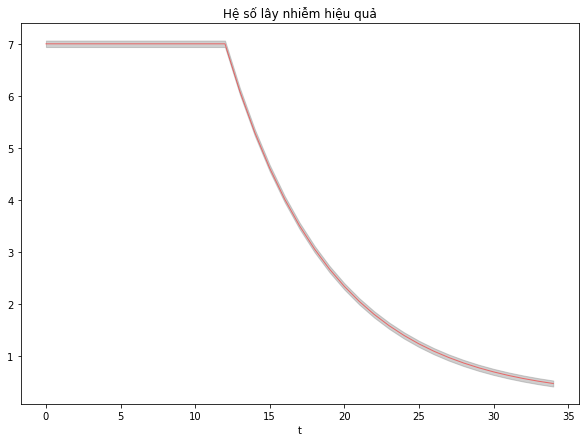

In [48]:
def sim(t):
  
  k = 0.144
  std_k = 0.0035
  c0 = 34.037
  std_c0 = 0.389
  cu = 0.933
  std_cu = 0.0037

  if (t > 12):
    std_ct = (std_c0 - std_cu)*math.exp(-std_k*(t-12)) + std_cu
    ct = (c0 - cu) * math.exp(-k*(t-12)) + cu
  else:
    ct = c0
    std_ct = std_c0
  
  
  std_beta = 0.0015
  std_q = 0.016
  std_gammaI = 0.0001
  std_deltaI = 0.001
  std_alpha = 0.0001

  beta = 0.111
  q = 0.415
  deltaI = 0.304
  gammaI = 0.0085
  alpha = 0.0027

  R = beta*ct*(1-q)/(deltaI+gammaI+alpha)
  std_R = std_beta*std_ct*(std_q)/(std_deltaI+std_gammaI+std_alpha)
  return [R,std_R]


R = np.linspace(0,34,35)
std_R = np.linspace(0,34,35)

for i in range(35):
  temp1, temp2 = sim(R[i])
  R[i] = temp1
  std_R[i] = temp2

#std_R
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(R,'red',alpha=0.5,linewidth=1.0)
ax.fill_between(np.linspace(0,34,35),R+8*std_R,R-8*std_R,color='#888888', alpha=0.4)

ax.set_xlabel('t')
ax.set_title('Hệ số lây nhiễm hiệu quả')

plt.savefig('fig6.png',dpi=1000)

## Plot assumption's simulations

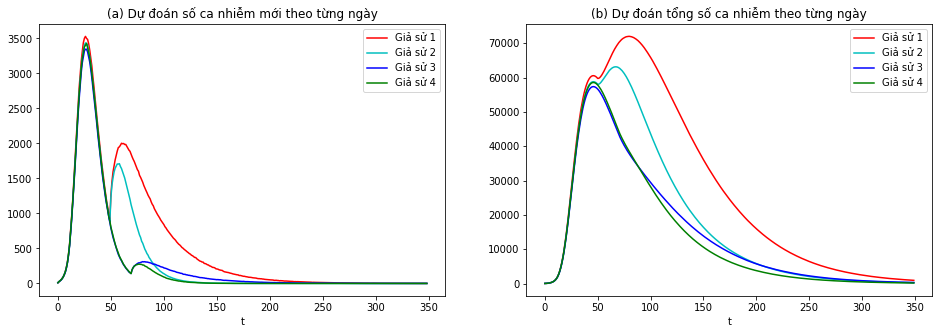

In [20]:
fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(1,2,1)

# assumption 1
t = 0
seir_out1 = pd.DataFrame(simulate(350,50,3))
while (t<50):
  seir_out1 = seir_out1 + pd.DataFrame(simulate(350,50,3))
  t=t+1
seir_out1 = seir_out1/50
H_sim1 = seir_out1.loc[:,'total_H']
H_sim1 = H_sim1.to_numpy()
H_diff1 = np.diff(H_sim1)
ax.plot(H_diff1, 'r',alpha=1, label='Giả sử 1')

# assumption 2
t = 0
seir_out2 = pd.DataFrame(simulate(350,50,1.5))
while (t<50):
  seir_out2 = seir_out2 + pd.DataFrame(simulate(350,50,1.5))
  t=t+1
seir_out2 = seir_out2/50
H_sim2 = seir_out2.loc[:,'total_H']
H_sim2 = H_sim2.to_numpy()
H_diff2 = np.diff(H_sim2)
ax.plot(H_diff2, 'c',alpha=1, label='Giả sử 2')

# assumption 3
t = 0
seir_out3 = pd.DataFrame(simulate(350,70,3))
while (t<50):
  seir_out3 = seir_out3 + pd.DataFrame(simulate(350,70,3))
  t=t+1
seir_out3 = seir_out3/50
H_sim3 = seir_out3.loc[:,'total_H']
H_sim3 = H_sim3.to_numpy()
H_diff3 = np.diff(H_sim3)
ax.plot(H_diff3, 'b',alpha=1, label='Giả sử 3')

# assumption 4
t = 0
seir_out4 = pd.DataFrame(simulate(350,70,1.5))
while (t<50):
  seir_out4 = seir_out4 + pd.DataFrame(simulate(350,70,1.5))
  t=t+1
seir_out4 = seir_out4/50
H_sim4 = seir_out4.loc[:,'total_H']
H_sim4 = H_sim4.to_numpy()
H_diff4 = np.diff(H_sim4)
ax.plot(H_diff4,'g',alpha=1,label='Giả sử 4')

ax.set_xlabel('t')
ax.set_title('(a) Dự đoán số ca nhiễm mới theo từng ngày')
plt.legend()

ax = fig.add_subplot(1,2,2)

H_sim1 = seir_out1.loc[:,'H']
H_sim1 = H_sim1.to_numpy()
ax.plot(H_sim1,'r',label='Giả sử 1')

H_sim2 = seir_out2.loc[:,'H']
H_sim2 = H_sim2.to_numpy()
ax.plot(H_sim2,'c',label='Giả sử 2')

H_sim3 = seir_out3.loc[:,'H']
H_sim3 = H_sim3.to_numpy()
ax.plot(H_sim3,'b',label='Giả sử 3')

H_sim4 = seir_out4.loc[:,'H']
H_sim4 = H_sim4.to_numpy()
ax.plot(H_sim4,'g',label='Giả sử 4')

ax.set_xlabel('t')
ax.set_title('(b) Dự đoán tổng số ca nhiễm theo từng ngày')
plt.legend()

plt.savefig('fig5.png',dpi=1000)

## Plot data fitting to simulation

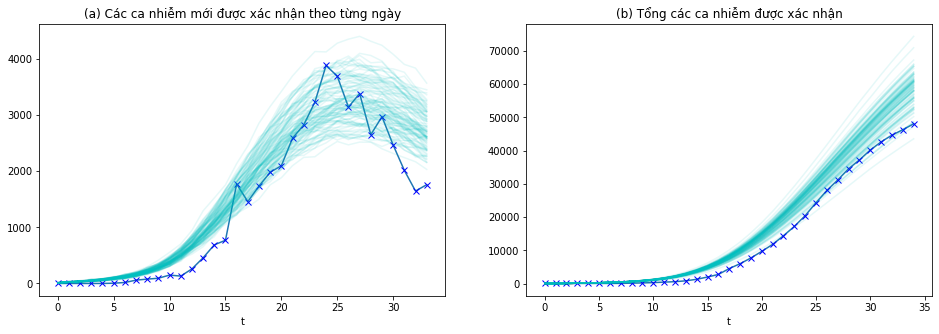

In [246]:
fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(1,2,1)
ax.plot(covid19_Ht)
ax.plot(covid19_Ht,'bx')

t=0
while (t<100):
  seir_out = pd.DataFrame(simulate(35))
  H_sim = seir_out.loc[:,'total_H']
  H_sim = H_sim.to_numpy()
  H_sim = np.diff(H_sim)
  ax.plot(H_sim, 'c',alpha=0.1)
  t=t+1

ax.set_xlabel('t')
ax.set_title('(a) Các ca nhiễm mới được xác nhận theo từng ngày')

ax = fig.add_subplot(1,2,2)
ax.plot(covid19[:-1,2])
ax.plot(covid19[:-1,2],'bx')

t=0
while (t<100):
  seir_out = pd.DataFrame(simulate(35))
  H_sim = seir_out.loc[:,'total_H']
  H_sim = H_sim.to_numpy()
  ax.plot(H_sim, 'c',alpha=0.1)
  t=t+1

ax.set_xlabel('t')
ax.set_title('(b) Tổng các ca nhiễm được xác nhận')
plt.savefig('fig2.png',dpi=1000)

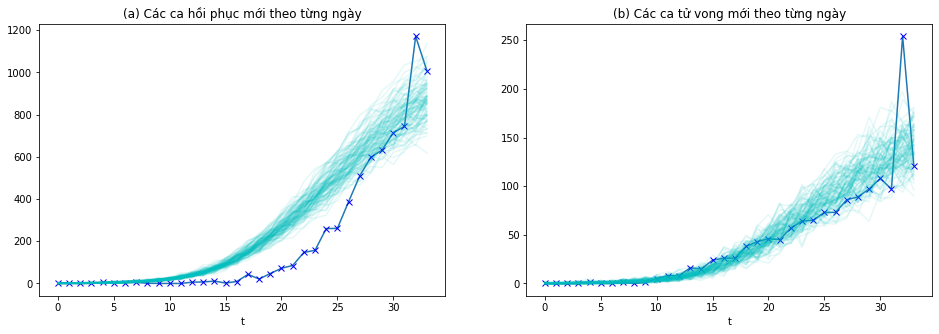

In [128]:
fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(1,2,1)
ax.plot(covid19_Rt)
ax.plot(covid19_Rt,'bx')

t=0
while (t<100):
  seir_out = pd.DataFrame(simulate(35))
  R_sim = seir_out.loc[:,'R']
  R_sim = R_sim.to_numpy()
  R_sim = np.diff(R_sim)
  ax.plot(R_sim, 'c',alpha=0.1)
  t=t+1

ax.set_xlabel('t')
ax.set_title('(a) Các ca hồi phục mới theo từng ngày')

ax = fig.add_subplot(1,2,2)
ax.plot(covid19_Dt)
ax.plot(covid19_Dt,'bx')

t=0
while (t<100):
  seir_out = pd.DataFrame(simulate(35))
  D_sim = seir_out.loc[:,'D']
  D_sim = D_sim.to_numpy()
  D_sim = np.diff(D_sim)
  ax.plot(D_sim, 'c',alpha=0.1)
  t=t+1

ax.set_xlabel('t')
ax.set_title('(b) Các ca tử vong mới theo từng ngày')
plt.savefig('fig3.png',dpi=1000)

## Prediction

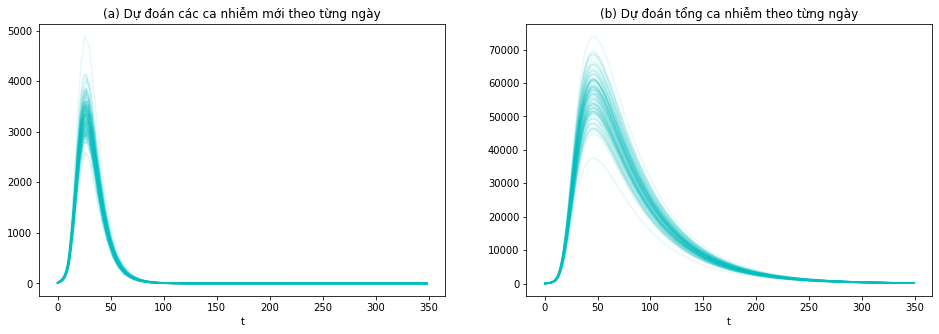

In [250]:
fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(1,2,1)

t=0
while (t<100):
  seir_out = pd.DataFrame(simulate(350))
  H_sim = seir_out.loc[:,'total_H']
  H_sim = H_sim.to_numpy()
  H_sim = np.diff(H_sim)
  H_sim = [0 if v<0 else v for v in H_sim]
  ax.plot(H_sim, 'c',alpha=0.1)
  t=t+1

ax.set_xlabel('t')
ax.set_title('(a) Dự đoán các ca nhiễm mới theo từng ngày')

ax = fig.add_subplot(1,2,2)

t=0
while (t<100):
  seir_out = pd.DataFrame(simulate(350))
  H_sim = seir_out.loc[:,'H']
  H_sim = H_sim.to_numpy()
  ax.plot(H_sim, 'c',alpha=0.1)
  t=t+1

ax.set_xlabel('t')
ax.set_title('(b) Dự đoán tổng ca nhiễm theo từng ngày')
plt.savefig('fig4.png',dpi=1000)

## Parameter estimator

### Test MH algorithm

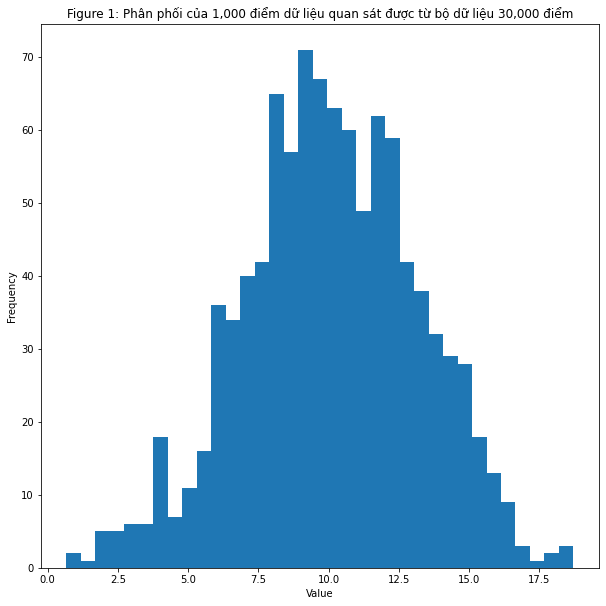

In [ ]:
mod1 = lambda t: np.random.normal(10,3,t)

#Tạo dữ liệu 30,000 điểm tuân theo phân phối chuẩn mu=10, sigma=3
population = mod1(30000)
#Giả sử chỉ quan sát được 1,000 điểm dữ liệu
observation = population[np.random.randint(0,30000,1000)]

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.hist(observation, bins=35)
ax.set_xlabel("Value")
ax.set_ylabel("Frequency")
ax.set_title("Figure 1: Phân phối của 1,000 điểm dữ liệu quan sát được từ bộ dữ liệu 30,000 điểm")
mu_obs = observation.mean()

In [ ]:
#Định nghĩa transition model
transition_model = lambda x: [x[0], np.random.normal(x[1],0.5,(1,))]

def prior(x):
  #x[0] = mu, x[1] = sigma (new or current)
  #return 1 với các giá trị sigma thỏa mãn điều kiện
  #return 0 với các giá trị không thỏa mãn
  if (x[1] <= 0):
    return 0
  return 1

#Tính hàm hợp lý của dữ liệu với sigma (new or current)
def manual_log_like_normal(x,data):
  #x[0]=mu, x[1]=sigma (new or current)
  #data = observation
  return np.sum(-np.log(x[1] * np.sqrt(2*np.pi)) - ((data-x[0])**2) / (2*x[1]**2))

def manual_log_like_bin(x,data):
  #

#Định nghĩa hàm chấp nhận
def acceptance(x, x_new):
  if x_new>x:
    return True
  else:
    accept = np.random.uniform(0,1)
    return (accept < (np.exp(x_new-x)))

#Thuật toán Metropolis Hastings
def metropolis_hastings(likelihood_computer,prior, transition_model, param_init,iteration,data, acceptance_rule):

  x = param_init
  accepted = []
  rejected = []
  for i in range(iteration):
    x_new = transition_model(x)
    x_lik = likelihood_computer(x,data)
    x_new_lik = likelihood_computer(x_new,data)
    if (acceptance_rule(x_lik + np.log(prior(x)), x_new_lik + np.log(prior(x_new)))):
      x = x_new
      accepted.append(x_new)
    else:
      rejected.append(x_new)

  return np.array(accepted), np.array(rejected)

(8469, 2)

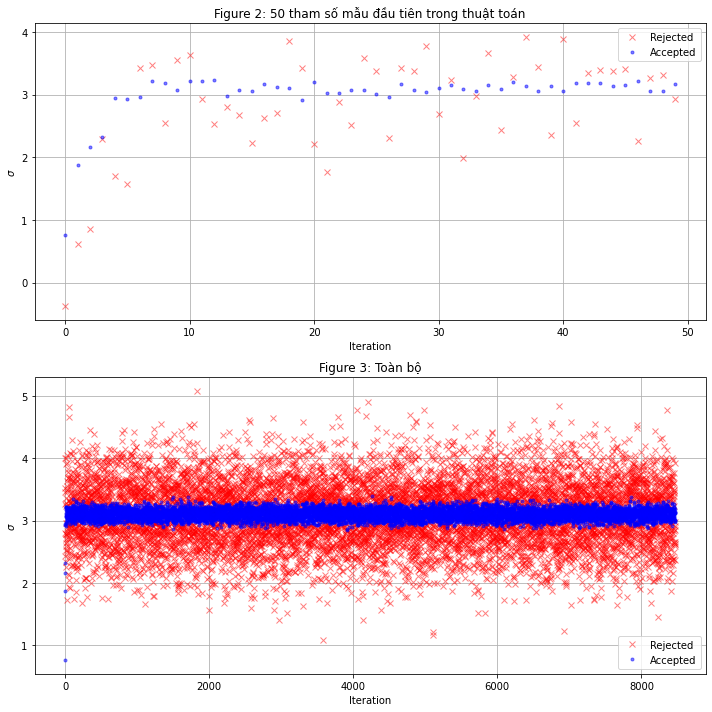

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,1,1)

ax.plot( rejected[0:50,1], 'rx', label="Rejected", alpha=0.5)
ax.plot( accepted[0:50,1], 'b.', label="Accepted", alpha=0.5)
ax.set_xlabel("Iteration")
ax.set_ylabel("$\sigma$")
ax.set_title("Figure 2: 50 tham số mẫu đầu tiên trong thuật toán")
ax.grid()
ax.legend()

ax2 = fig.add_subplot(2,1,2)
to_show = -accepted.shape[0]
ax2.plot(rejected[to_show:,1], 'rx', label="Rejected", alpha=0.5)
ax2.plot(accepted[to_show:,1], 'b.', label="Accepted", alpha=0.5)
ax2.set_xlabel("Iteration")
ax2.set_ylabel("$\sigma$")
ax2.set_title("Figure 3: Toàn bộ")
ax2.grid()
ax2.legend()

fig.tight_layout()
accepted.shape

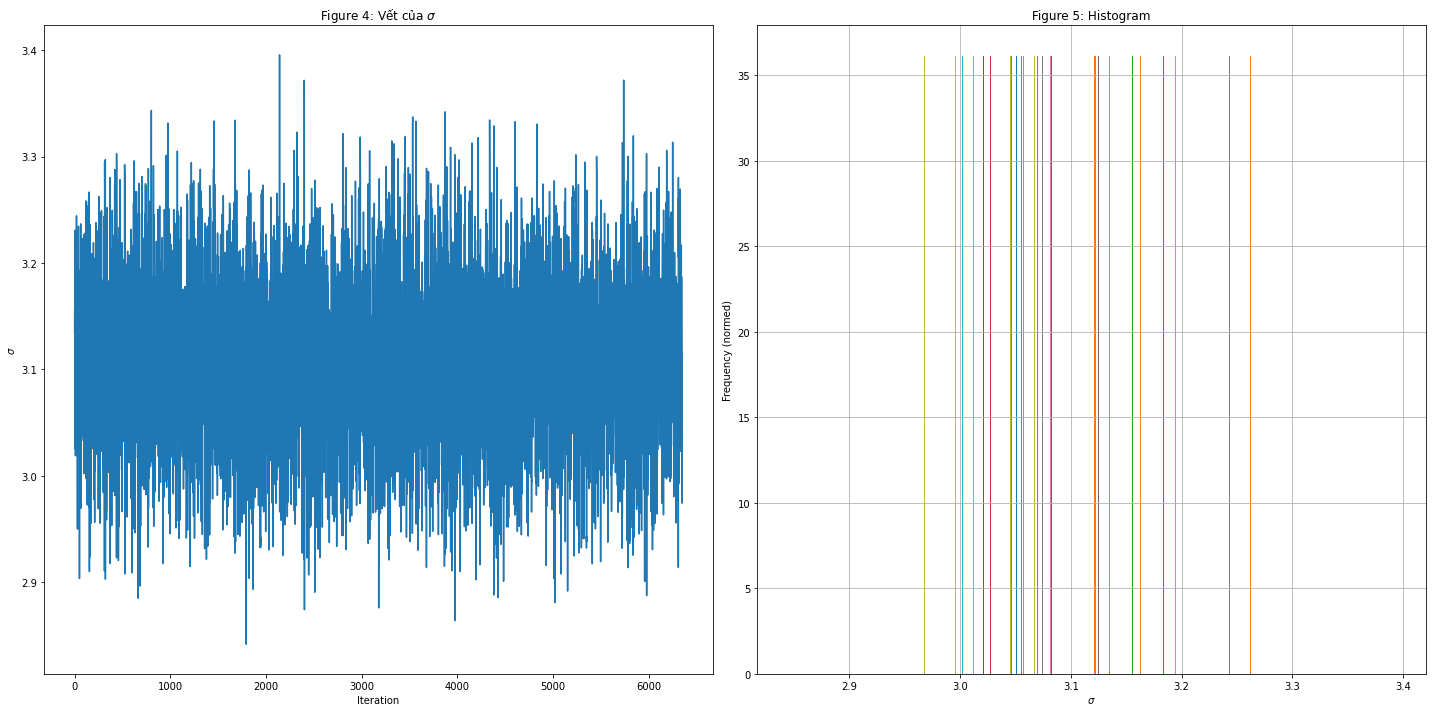

In [ ]:
#Bỏ 25% giá trị đầu tiên (burn-in)
show = int(-0.75*accepted.shape[0])
hist_show = int(-0.75*accepted.shape[0])

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,2,1)
ax.plot(accepted[show:,1])
ax.set_title("Figure 4: Vết của $\sigma$")
ax.set_xlabel("Iteration")
ax.set_ylabel("$\sigma$")

ax = fig.add_subplot(1,2,2)
ax.hist(accepted[hist_show:,1],bins=20,density=True)
ax.set_ylabel("Frequency (normed)")
ax.set_xlabel("$\sigma$")
ax.set_title("Figure 5: Histogram")
fig.tight_layout()

ax.grid("off")